<a href="https://colab.research.google.com/github/JorgeBosquez/Tarea-03-Metodos-Numericos/blob/main/MinimoscuadradosExamenipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)

    return (c_2, c_1, c_0, c_ind)

In [30]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

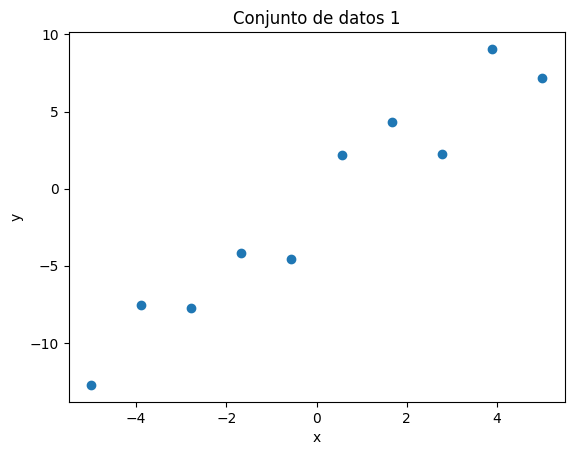

In [31]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [32]:
%autoreload 2
from src import ajustar_min_cuadrados
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1,der_parcial_2])
pars # parámetros de la curva ajustada

array([-0.04895654,  2.06057364, -0.67492497])

In [33]:
def parabola(x: float, pars: tuple[float, float, float]) -> float:
    """Ecuación de la parábola y = a2 * x^2 + a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la parábola. Deben ser de la forma (a2, a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

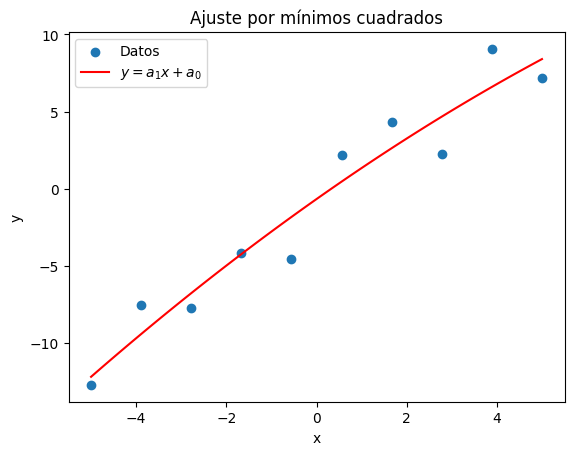

In [34]:
import numpy as np

x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

In [35]:
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

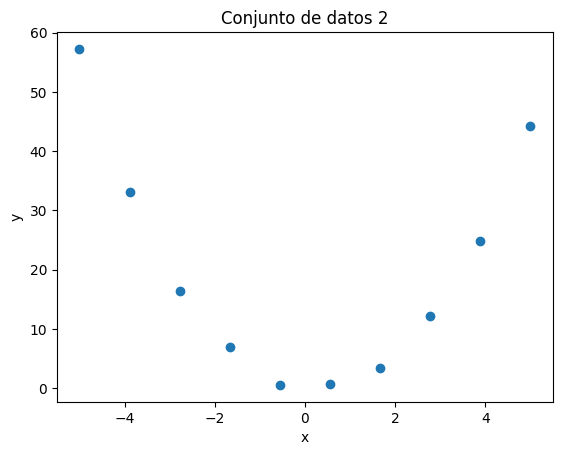

In [36]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

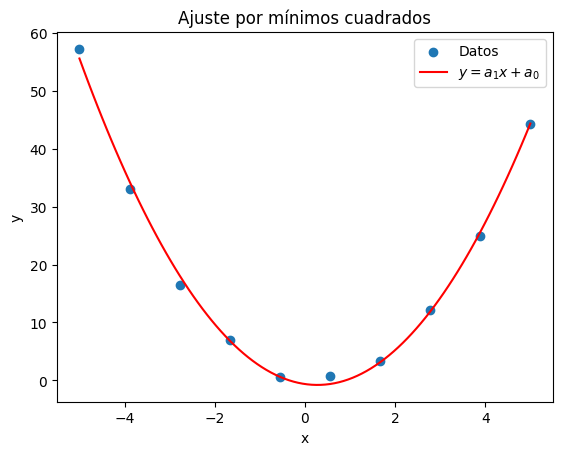

In [37]:
import numpy as np

x = np.linspace(-5, 5, 100)

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1,der_parcial_2])

y = [parabola(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()